In [1]:
import random
import matplotlib.pyplot as plt
import matplotlib.animation as anim
%matplotlib notebook

# Bubble Sort

In [2]:
def Bubble_sort(A):
    n=len(A)
    for i in range(n):
        for j in range(n-1-i):
            if A[j]>A[j+1]:
                A[j],A[j+1]=A[j+1],A[j]
            yield A

# Insertion Sort

In [3]:
def Insertionsort(A):
    n=len(A)
    for i in range(1,n):
        key=A[i]
        j=i-1
        while j>=0 and A[j]>key:
            A[j+1]=A[j]
            j-=1
        A[j+1]=key
        yield A     
#or
def Insertion_sort(A):
    n=len(A)
    for i in range(1, n):
        j = i
        while j > 0 and A[j] < A[j - 1]:
            A[j],A[j - 1]=A[j-1],A[j]
            j -= 1
            yield A

# Merge Sort

In [4]:
def Merge_sort(A, start, end):
    if end <= start:
        return

    mid = start + ((end - start + 1) // 2) - 1
    yield from Merge_sort(A, start, mid)
    yield from Merge_sort(A, mid + 1, end)
    yield from Merge(A, start, mid, end)
    yield A

def Merge(A, start, mid, end):    
    merged = []
    leftIdx = start
    rightIdx = mid + 1

    while leftIdx <= mid and rightIdx <= end:
        if A[leftIdx] < A[rightIdx]:
            merged.append(A[leftIdx])
            leftIdx += 1
        else:
            merged.append(A[rightIdx])
            rightIdx += 1

    while leftIdx <= mid:
        merged.append(A[leftIdx])
        leftIdx += 1

    while rightIdx <= end:
        merged.append(A[rightIdx])
        rightIdx += 1

    for i, sorted_val in enumerate(merged):
        A[start + i] = sorted_val
        yield A


# Quick Sort

In [5]:
def quick_sort(sequence):
    length=len(sequence)
    if length<=1:
        return sequence
    else:
        pivot=sequence.pop()
        
    items_greater=[]
    items_lower=[]
    for  item in sequence:
        if item>pivot:
            items_greater.append(item)
        else:
            items_lower.append(item)
    return Quick_sort(items_lower)+[pivot]+Quick_sort(items_greater)

# A=[9,2,8,4,7,1]
# print(quick_sort(A))

#or

def Quick_sort(A,start,end):
    if start>=end:
        return
    pivot=A[end]
    pivot_idx=start
    
    for i in range(start,end):
        if A[i]<pivot:
            A[i],A[pivot_idx]=A[pivot_idx],A[i]
            pivot_idx+=1
        yield A
    A[end],A[pivot_idx]=A[pivot_idx],A[end]
    yield A
    yield from Quick_sort(A,start,pivot_idx-1)
    yield from Quick_sort(A,pivot_idx+1,end)

# Selection Sort

In [6]:
def Selection_sort(A):
    if len(A) == 1:
        return

    for i in range(len(A)):
        min_ele_idx=i
        for j in range(i+1, len(A)):
            if A[min_ele_idx] >A[j]:
                min_ele_idx = j
            yield A
        A[i], A[min_ele_idx]=A[min_ele_idx],A[i]
        yield A

Enter the number of integers to be stored22
select the sorting method:
b-Bubble Sort
i-Insertion Sort
m-Merge Sort
q-Quicksort
s-Selection Sort
q


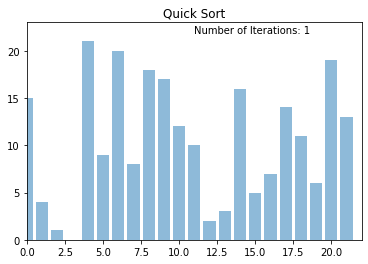

In [7]:
if __name__ == "__main__":
    N=int(input('Enter the number of integers to be stored'))
    sorting_method=input('select the sorting method:\nb-Bubble Sort\ni-Insertion Sort\nm-Merge Sort\nq-Quicksort\ns-Selection Sort\n')
    A=[i for i in range(N)]
    random.shuffle(A) 
    if sorting_method=='b':
        viz_title='Bubble Sort'
        generator=Bubble_sort(A)
    if sorting_method=='i':
        viz_title='Insertion Sort'
        generator=Insertion_sort(A)
    if sorting_method=='m':
        viz_title='Merge Sort'
        generator=Merge_sort(A,0,N-1)
    if sorting_method=='q':
        viz_title='Quick Sort'
        generator=Quick_sort(A,0,N-1)
    if sorting_method=='s':
        viz_title='Selection Sort'
        generator=Selection_sort(A)

fig, ax = plt.subplots()
ax.set_title(viz_title)
bar_rects = ax.bar(range(len(A)), A,alpha=0.5
                  )
ax.set_xlim(0, N)
ax.set_ylim(0, int(1.07 * N))
label_text = ax.text(0.5, 0.95, "", transform=ax.transAxes)
iteration =[0]
def update_fig(A, rects, iteration):
    for rect, val in zip(rects, A):
        rect.set_height(val)
    iteration[0] += 1
    label_text.set_text("Number of Iterations: {}".format(iteration[0]))

a= anim.FuncAnimation(fig, func=update_fig,
    fargs=(bar_rects, iteration), frames=generator, interval=1,
    repeat=False)
plt.show()
        